<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [9]:
import pandas as pd

Load the dataset into a dataframe.


In [10]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.

In [4]:
print(df['ConvertedComp'].isnull().sum())
df['ConvertedComp']=df['ConvertedComp'].fillna(0)
print(df['ConvertedComp'].isnull().sum())

816
0


<AxesSubplot:ylabel='Density'>

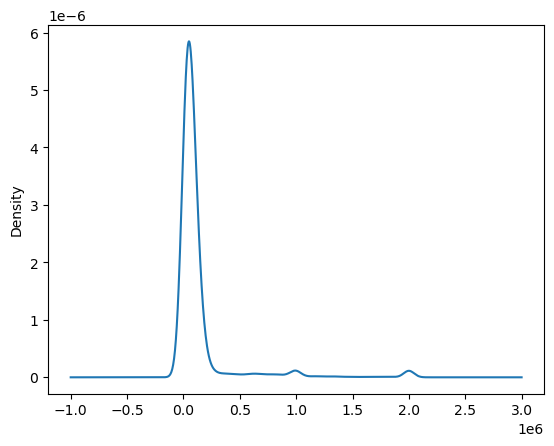

In [11]:
# your code goes here
df['ConvertedComp'].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:>

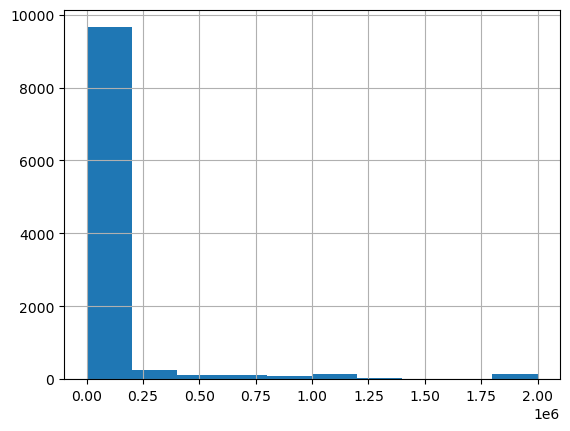

In [12]:
# your code goes here
df["ConvertedComp"].hist()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
df["Age"].median()

29.0

How many responders identified themselves only as a **Man**?


In [14]:
# your code goes here
df["ConvertedComp"].groupby(df["Gender"]).count()["Man"]

9725

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
# your code goes here
df["ConvertedComp"].groupby(df["Gender"]).median()["Woman"]

57708.0

Give the five number summary for the column `Age`?


In [16]:
# your code goes here
df["Age"].describe()[['min', '25%', '50%', '75%', 'max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:>

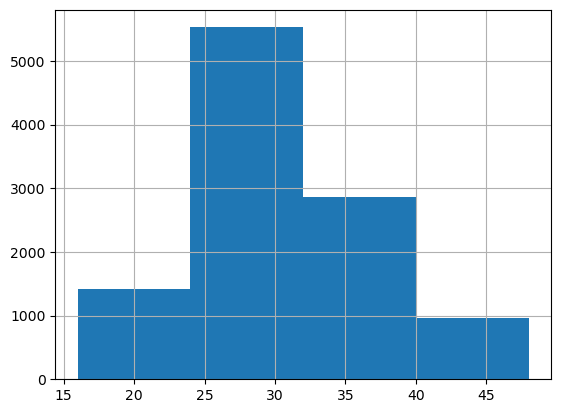

In [19]:
# your code goes here
df["Age"].hist(bins=[16, 24, 32, 40, 48])


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

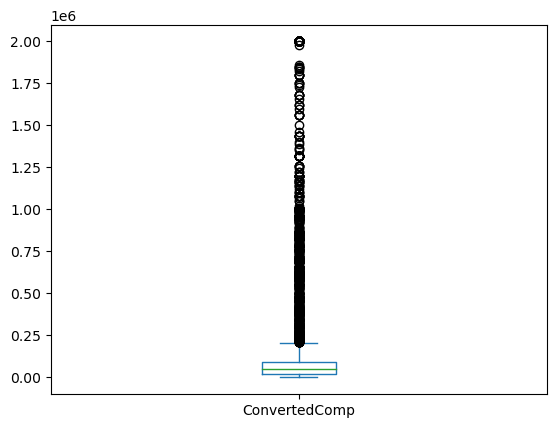

In [11]:
# your code goes here
df["ConvertedComp"].plot(kind="box")

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

75332.0


Find out the upper and lower bounds.


In [13]:
# your code goes here
min_val = df['ConvertedComp'].min()
max_val = df['ConvertedComp'].max()
print('Min:',min_val, ' Max:', max_val)

Min: 0.0  Max: 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here
((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum()

881

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [17]:
# your code goes here
df_new=df.loc[~(df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [18]:
# your code goes here
df.corr()["Age"]


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.104135
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64